### About the Dataset:

1. id: unique id for a news article
2. title: the title of a news article
3. author: author of the news article
4. text: the text of the article; could be incomplete
5. label: a label that marks whether the news article is real or fake:
           1: Fake news
           0: Real News

In [2]:
import re

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import itertools
import time

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier, plot_tree, ExtraTreeClassifier

from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier, RidgeClassifier, LogisticRegression, Perceptron 
from sklearn.neural_network import MLPClassifier


from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, StackingClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.calibration import CalibratedClassifierCV

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from wordcloud import WordCloud, STOPWORDS

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pepi_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
news_dataset = pd.read_csv('data/fake-news/train.csv')

In [8]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# EDA

In [9]:
news_dataset.shape

(20800, 5)

In [10]:
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [11]:
news_dataset.label.value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [12]:
news_dataset = news_dataset.fillna(value = {"title": "", "author": "", "text": ""})

In [13]:
news_dataset.isna().any()

id        False
title     False
author    False
text      False
label     False
dtype: bool

In [14]:
news_dataset['data'] = news_dataset['author']+' '+news_dataset['title']

In [15]:
print(news_dataset['data'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: data, Length: 20800, dtype: object


In [16]:
news_dataset[news_dataset["data"] == ""]

,id,title,author,text,label,data


In [17]:
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [18]:
len(news_dataset)

20800

In [19]:
len(news_dataset[news_dataset.label == 1])

10413

In [20]:
len(news_dataset[news_dataset.label == 0])

10387

In [21]:
print(X,'\n\n\n\n',Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

# Stemming

In [22]:
stem_words = PorterStemmer()

In [23]:
def stemming(data):
    
    stemmed_content = re.sub('[^a-zA-Z]',' ',data)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [stem_words.stem(word) for word in stemmed_content if not word in stopwords.words("english")]
    stemmed_content = ' '.join(stemmed_content)
    
    return stemmed_content

In [24]:
news_dataset['data'] = news_dataset['data'].apply(stemming)

# Visualizing

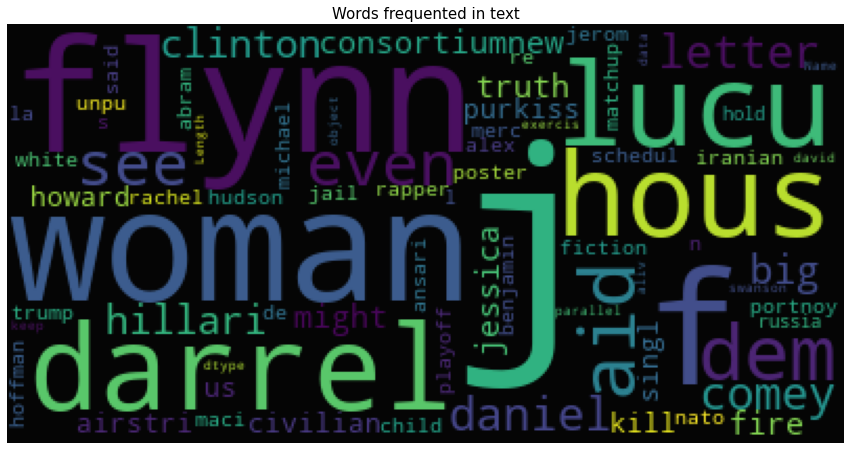

In [25]:
wordcloud = WordCloud(
                        background_color='black',
                        stopwords=STOPWORDS,
                        max_words=200, 
                        random_state=42).generate(str(news_dataset['data']))

plt.figure(figsize=(15,10))
plt.axis("off")
plt.title("Words frequented in text", fontsize=15)
plt.imshow(wordcloud.recolor(colormap= 'viridis' , random_state=42), alpha=0.98)
plt.show()

In [26]:
print(news_dataset['data'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: data, Length: 20800, dtype: object


# Modelling

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Here we print the if confusion matrix is normalized
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # Here we include text that shows confusion matrix values
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [28]:
def model_report(model, X_test, y_test):
    pred = model.predict(X_test)

    print(accuracy_score(y_test, pred) * 100)
    print(classification_report(y_test, pred))

    cm = confusion_matrix(y_test, pred)

    plot_confusion_matrix(cm, classes=['Fake News', 'Real News'])

In [29]:
X = news_dataset['data'].values
Y = news_dataset['label'].values

In [30]:
print(X,'\n\n\n\n',Y)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv'] 



 [1 0 1 ... 0 1 1]


In [31]:
vectorizer = TfidfVectorizer()

vectorizer.fit(X)

X = vectorizer.transform(X)

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify=Y, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

# Accuracy Check

### Training Accuracy 

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

### Testing Accuracy 

In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

# Model Prediction

In [ ]:
X_new = X_test[1]
X_new_2 = X_test[0]

X_New_3 = X_test[22]

result = model.predict(X_new)
result_1 = model.predict(X_new_2)


def get_type(prediction):
    if (prediction[0]==0):
        return 'Real'
    else:
        return 'Fake'
    
print(f"The news is {get_type(result)}")
print(f"The news is {get_type(result_1)}")

In [ ]:
model_report(model, X_test, Y_test)

In [ ]:
print(Y_test[0])

In [ ]:
model2 = DecisionTreeClassifier(random_state = 42)
model2.fit(X_train, Y_train)

In [ ]:
X_test_prediction = model2.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

In [ ]:
X_train_prediction = model2.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

In [ ]:
model2.score(X_test, Y_test)

In [ ]:
pa = PassiveAggressiveClassifier(n_iter_no_change= 50, loss = "squared_hinge")
pa.fit(X_train, Y_train)

In [ ]:
model_report(pa, X_test, Y_test)

In [ ]:
fig = plt.figure(figsize=(100, 100))

ax = fig.gca()

plot_tree(model2, ax=ax)

plt.show()

In [ ]:
plot_tree(model2, max_depth=1)

plt.show()

In [ ]:
parameters_PassiveAggressive = {'C': (0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2.),
                                'fit_intercept': (True, False),
                                'n_iter_no_change': (1, 2, 3, 5, 8, 13, 21, 50),
                                'shuffle': (True, False),
                                'loss': ('hinge', 'squared_hinge'),
                                'warm_start': (True, False)}


In [ ]:
pa_params = GridSearchCV(PassiveAggressiveClassifier(), parameters_PassiveAggressive, n_jobs=-1, verbose=1)
pa_params.fit(X_train, Y_train)

In [ ]:
pa_best = pa_params.best_estimator_

pa_best.fit(X_train, Y_train)

In [ ]:
model_report(pa_best, X_test, Y_test)

In [37]:
additional_data = pd.read_csv("data/fake_or_real_news.csv")


additional_data = additional_data.rename(columns = {"Unnamed: 0": "id"})

additional_data.label = additional_data.label.replace(["REAL", "FAKE"], [0, 1])


labels = additional_data.label

additional_data = additional_data.drop(columns=["label"])

additional_data["title"] = additional_data["title"].apply(stemming)

In [38]:
tfidf_v = TfidfVectorizer(max_features = 100000, ngram_range=(1,3))

X_additional = tfidf_v.fit_transform(additional_data["title"])

In [39]:
X_additional_train, X_additional_test, y_additional_train, y_additional_test = train_test_split(X_additional, labels, random_state=0, test_size = 0.1, stratify = labels)

In [ ]:
model_report(pa, X_additional_test[:, :17128], y_additional_test[:17128])

In [ ]:
tree_params = {'criterion': ['gini', 'entropy'], 'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15,
                                                               20, 30, 40, 50, 70, 90, 120, 150], 'splitter': ['best', 'random'], 'random_state': [42, 256]}

grid_search = GridSearchCV(DecisionTreeClassifier(), tree_params, cv = 5)

grid_search.fit(X_train, Y_train)


In [ ]:
best_tree_params = grid_search.best_params_

In [ ]:
best_tree_params

In [ ]:
tree = DecisionTreeClassifier(max_depth=70, random_state=256,splitter='best')

tree.fit(X_train, Y_train)

In [ ]:
model_report(tree, X_test, Y_test)

In [ ]:
parameters_PassiveAggressive = {'C': (0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2.),
                                'fit_intercept': (True, False),
                                'n_iter_no_change': (1, 2, 3, 5, 8, 13, 21, 50),
                                'shuffle': (True, False),
                                'loss': ('hinge', 'squared_hinge'),
                                'warm_start': (True, False)}


In [ ]:
pa_params = GridSearchCV(PassiveAggressiveClassifier(), parameters_PassiveAggressive, cv = 10)
pa_params.fit(X_train, Y_train)

In [ ]:
pa_params.best_params_

In [ ]:
clf = BaggingClassifier(
    base_estimator=PassiveAggressiveClassifier(n_iter_no_change=50, early_stopping=True, random_state = 42),
    n_estimators = 1,
    random_state = 42,
).fit(X_train, Y_train)

In [ ]:
model_report(clf, X_additional_test[:, :17128], y_additional_test)

In [ ]:
perc = Perceptron()

perc.fit(X_train, Y_train)

In [ ]:
model_report(perc, X_test, Y_test)

In [ ]:
sgd = SGDClassifier(loss = 'squared_hinge', random_state = 42, warm_start = True, alpha = .0000000000000001)

sgd.partial_fit(X_train, Y_train, classes = [0, 1])

sgd.partial_fit(X_additional_train[:, :17128], y_additional_train)

In [ ]:
model_report(sgd, X_test, Y_test)

In [ ]:
model_report(sgd, X_additional_test[:, :17128], y_additional_test)

In [ ]:
bag_pa = BaggingClassifier(PassiveAggressiveClassifier(random_state = 42), random_state = 42)

bag_pa.fit(X_train, Y_train)

In [ ]:
cal_pa = CalibratedClassifierCV(bag_pa)

cal_pa.fit(X_train, Y_train)

In [ ]:
model_report(cal_pa, X_test, Y_test)

In [ ]:
model_report(cal_pa, X_additional_test[:, :17128], y_additional_test)

In [ ]:
clf1 = BaggingClassifier(PassiveAggressiveClassifier(random_state = 42)).fit(X_train, Y_train)
clf2 = BaggingClassifier(LogisticRegression(random_state = 42)).fit(X_train, Y_train)
clf3 = BaggingClassifier(DecisionTreeClassifier(random_state = 42)).fit(X_train, Y_train)
clf4 = BaggingClassifier(RidgeClassifier(random_state = 42)).fit(X_train, Y_train)
clf5 = BaggingClassifier(SGDClassifier(random_state = 42)).fit(X_train, Y_train)
clf6 = BaggingClassifier(Perceptron(random_state = 42)).fit(X_train, Y_train)
clf7 = BaggingClassifier(RandomForestClassifier(n_estimators = 50, random_state = 42)).fit(X_train, Y_train)

final_clf = BaggingClassifier(AdaBoostClassifier(random_state = 42)).fit(X_train, Y_train)

In [ ]:
stack = StackingClassifier(
    estimators = [
        ('pa', clf1),
        ('lgr', clf2),
        ('tree', clf3),
        ('ridge', clf4),
        ('sgd', clf5),
        ('perceptron', clf6),
        ('f', clf7),
    ],
    final_estimator = final_clf,
    stack_method = 'predict'
)


stack.fit(X_train, Y_train)

In [ ]:
model_report(stack, X_test, Y_test)

In [ ]:
model_report(stack, X_additional_test[:, :17128], y_additional_test)

In [ ]:
vote = VotingClassifier(
    estimators = [
        ('lgr', clf2),
        ('tree', clf3),
        ('sgd', clf5),
        ('perceptron', clf6),
        ('f', clf7),
    ],
    voting = 'soft'
)

vote.fit(X_train, Y_train)

In [ ]:
model_report(vote, X_test, Y_test)

In [ ]:
model_report(vote, X_additional_test[:, :17128], y_additional_test)

In [ ]:
ada = BaggingClassifier(
    AdaBoostClassifier(
        LogisticRegression(),
        random_state = 42,
        n_estimators = 100,
        learning_rate = 2
    ),
    random_state = 42
).fit(X_train, Y_train)

In [ ]:
ada.score(X_test, Y_test)

In [ ]:
model_report(ada, X_additional_test[:, :17128], y_additional_test)

Stacking

In [62]:
clf1 = BaggingClassifier(DecisionTreeClassifier(random_state = 42), random_state = 42).fit(X_train, Y_train)

In [63]:
clf2 = BaggingClassifier(SGDClassifier(random_state = 42), random_state = 42).fit(X_train, Y_train)

In [64]:
clf3 = BaggingClassifier(LogisticRegression(random_state = 42), random_state = 42).fit(X_train, Y_train)

In [65]:
clf4 = BaggingClassifier(Perceptron(random_state = 42), random_state = 42).fit(X_train, Y_train)

In [66]:
clf5 = BaggingClassifier(RandomForestClassifier(random_state = 42), random_state = 42).fit(X_train, Y_train)

In [67]:
clf6 = BaggingClassifier(AdaBoostClassifier(random_state = 42), random_state = 42).fit(X_train, Y_train)

In [68]:
clf7 = BaggingClassifier(PassiveAggressiveClassifier(random_state = 42), random_state = 42).fit(X_train, Y_train)

In [69]:
clf8 = BaggingClassifier(RidgeClassifier(random_state = 42), random_state = 42).fit(X_train, Y_train)

In [70]:
clf9 = BaggingClassifier(KNeighborsClassifier(), random_state = 42).fit(X_train, Y_train)

In [71]:
clf10 = BaggingClassifier(LinearSVC(random_state = 42), random_state = 42).fit(X_train, Y_train)

In [72]:
clf11 = BaggingClassifier(KMeans(n_clusters = 2, random_state = 42), random_state = 42).fit(X_train, Y_train)

In [73]:
clf12 = BaggingClassifier(MultinomialNB(), random_state = 42).fit(X_train, Y_train)

In [74]:
clf13 = BaggingClassifier(MLPClassifier(random_state = 42), random_state = 42).fit(X_train, Y_train)

C:\Users\pepi_\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\pepi_\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\pepi_\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\pepi_\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\pepi_\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\pepi_\anaconda3\lib\site-packages\sklearn\neur

In [77]:
clf14 = BaggingClassifier(ExtraTreeClassifier(random_state = 42), random_state = 42).fit(X_train, Y_train)

In [78]:
clf15 = GradientBoostingClassifier(n_iter_no_change = 1, random_state = 42).fit(X_train, Y_train)

In [95]:
start = time.time()

vote = VotingClassifier(
    estimators = [
        ('decision_tree', clf1),
        ('sgd', clf2),
        ('logistic_regression', clf3),
        ('perceptron', clf4),
#         ('random_forest', clf5),
#         ('ada_boost', clf6),
        ('passive_aggressive', clf7),
        ('ridge', clf8),
        ('k-neighbours', clf9),
        ('linear_svc', clf10),
        ('k-means', clf11),
        ('multinomial_nb', clf12),
#         ('mlp', clf13),
        ('extra_tree', clf14),
        ('gradient_boosting', clf15)
    ],
    verbose = True
)

vote.fit(X_train, Y_train)

[Voting] ........... (1 of 12) Processing decision_tree, total=   5.8s
[Voting] ..................... (2 of 12) Processing sgd, total=   0.1s
[Voting] ..... (3 of 12) Processing logistic_regression, total=   2.4s
[Voting] .............. (4 of 12) Processing perceptron, total=   0.1s
[Voting] ...... (5 of 12) Processing passive_aggressive, total=   0.2s
[Voting] ................... (6 of 12) Processing ridge, total=   0.4s
[Voting] ............ (7 of 12) Processing k-neighbours, total=   0.0s
[Voting] .............. (8 of 12) Processing linear_svc, total=   0.3s
[Voting] ................. (9 of 12) Processing k-means, total=  10.5s
[Voting] ......... (10 of 12) Processing multinomial_nb, total=   0.1s
[Voting] ............. (11 of 12) Processing extra_tree, total=   2.8s
[Voting] ...... (12 of 12) Processing gradient_boosting, total=  21.9s


VotingClassifier(estimators=[('decision_tree',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                                                random_state=42)),
                             ('sgd',
                              BaggingClassifier(base_estimator=SGDClassifier(random_state=42),
                                                random_state=42)),
                             ('logistic_regression',
                              BaggingClassifier(base_estimator=LogisticRegression(random_state=42),
                                                random_state=42)),
                             ('perceptron',...
                              BaggingClassifier(base_estimator=KMeans(n_clusters=2,
                                                                      random_state=42),
                                                random_state=42)),
                             ('multinomial_nb',
                              BaggingClassifier(base_estimator=MultinomialNB(),
                                                random_state=42)),
                             ('extra_tree',
                              BaggingClassifier(base_estimator=ExtraTreeClassifier(random_state=42),
                                                random_state=42)),
                             ('gradient_boosting',
                              GradientBoostingClassifier(n_iter_no_change=1,
                                                         random_state=42))],
                 verbose=True)

In [ ]:
vote.score(X_test, Y_test)

In [58]:
gb = GradientBoostingClassifier(random_state = 42)

gb.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=42)

In [59]:
cross_val_score(gb, X_test, Y_test)

array([0.95432692, 0.95673077, 0.94951923, 0.96153846, 0.95913462])

In [60]:
cross_val_score(gb, X_additional_test, y_additional_test)

array([0.7480315 , 0.62204724, 0.70866142, 0.64566929, 0.67460317])

50.1577287066246
              precision    recall  f1-score   support

           0       0.67      0.01      0.01       317
           1       0.50      1.00      0.67       317

    accuracy                           0.50       634
   macro avg       0.58      0.50      0.34       634
weighted avg       0.58      0.50      0.34       634

Confusion matrix, without normalization


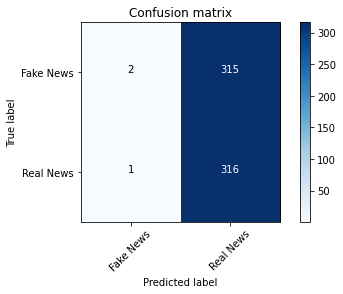

In [61]:
model_report(gb, X_additional_test[:, :17128], y_additional_test)

In [98]:
test = CalibratedClassifierCV(base_estimator = GradientBoostingClassifier(verbose = True))

test.fit(X_train, Y_train)

      Iter       Train Loss   Remaining Time 
         1           1.2434           17.82s
         2           1.1266           17.64s
         3           1.0293           17.36s
         4           0.9476           17.21s
         5           0.8781           17.09s
         6           0.8184           17.04s
         7           0.7674           16.87s
         8           0.7230           16.65s
         9           0.6844           16.44s
        10           0.6508           16.26s
        20           0.4723           14.54s
        30           0.4161           12.60s
        40           0.3802           10.76s
        50           0.3524            8.93s
        60           0.3278            7.12s
        70           0.3068            5.34s
        80           0.2898            3.55s
        90           0.2719            1.77s
       100           0.2559            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.2438           17.66s
        

KeyboardInterrupt: 

In [82]:
cross_val_score(test, X_additional_test, y_additional_test)

array([0.7480315 , 0.66141732, 0.74015748, 0.67716535, 0.67460317])

In [92]:
test.score(X_additional_test[:, :17128], y_additional_test)

0.5031545741324921